In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df_test = pd.read_csv('fraudTest.csv')

In [34]:
df_train = pd.read_csv('fraudTrain.csv')

In [35]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [36]:
cols_to_drop = ['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
features_test = df_test.drop(cols_to_drop, axis=1)
features_train = df_train.drop(cols_to_drop, axis=1)

In [37]:
features_test.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [38]:
features_test = features_test.dropna()
features_train = features_train.dropna()

In [39]:
to_encode = ['zip', 'category', 'gender']
features_test = pd.get_dummies(features_test, columns=to_encode)
features_train = pd.get_dummies(features_train, columns=to_encode)

In [40]:
features_test.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [41]:
features_test.columns

Index(['trans_date_trans_time', 'cc_num', 'amt', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       ...
       'category_home', 'category_kids_pets', 'category_misc_net',
       'category_misc_pos', 'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M'],
      dtype='object', length=938)

In [42]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Apply the function to both df_train and df_test
for features in [features_train, features_test]:
    features['distance_user_merchant'] = features.apply(
        lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
        axis=1
    )

In [43]:
cols_to_drop = ['lat', 'long', 'merch_lat', 'merch_long']

features_test = features_test.drop(columns=cols_to_drop)
features_train = features_train.drop(columns=cols_to_drop)

In [44]:
for df in [features_train, features_test]:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    df['trans_month'] = df['trans_date_trans_time'].dt.month

    df['unix_hour'] = df['unix_time'].dt.hour
    df['unix_day_of_week'] = df['unix_time'].dt.dayofweek
    df['unix_month'] = df['unix_time'].dt.month

In [45]:
cols_to_drop = ['trans_date_trans_time', 'unix_time']

features_train = features_train.drop(columns=cols_to_drop)
features_test = features_test.drop(columns=cols_to_drop)

In [46]:
target_test = df_test['is_fraud']
target_train = df_train['is_fraud']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pickle
import xgboost as xgb

In [48]:
# Ensure features_train and target_train have the same number of rows
features_train = features_train.iloc[:min(features_train.shape[0], target_train.shape[0])]
target_train = target_train.iloc[:min(features_train.shape[0], target_train.shape[0])]

# Now proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

In [49]:
string_cols = features_train.select_dtypes(include=['object']).columns

In [50]:
string_cols

Index([], dtype='object')

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print("---------------")

    with open(filename, 'wb') as file:
        pickle.dump(model, file)

    print(f"Model saved as {filename}")

In [53]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, 'xgb_model.pkl')

XGBClassifier Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       1.00      1.00      1.00      1520

    accuracy                           1.00    259335
   macro avg       1.00      1.00      1.00    259335
weighted avg       1.00      1.00      1.00    259335

---------------
Model saved as xgb_model.pkl


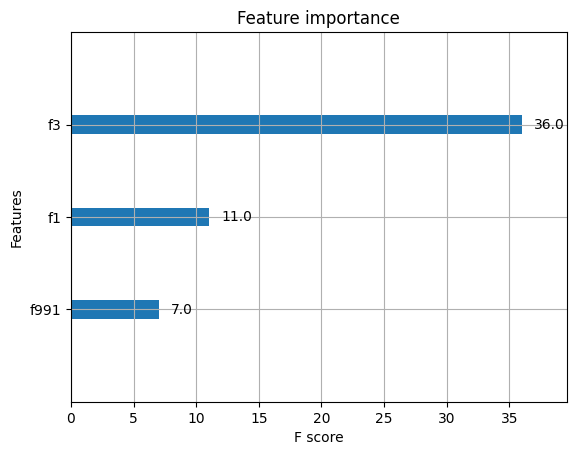

In [57]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10)  # Show top 10 features
plt.show()